<h3 style='text-align: center;'> Table of Contents </h3>

#### [Set up the environment](#set_up)
    
#### [1 - Describe the data](#task1)
> [1.1 - Univariate analysis](#uni)<br>
> [1.2 - Bivariate analysis](#bi)<br>

#### [2 - Principal component analysis](#task2)
> [2.1 - Scree plot](#scree)<br>
> [2.2 - Correlation circle](#circle)<br>

#### [3 - Classification algorithm](#task3)
> [3.1 - K-means clustering](#kmeans)<br>
> [3.2 - Individual factorial planes](#planes)<br>

#### [4 - Predictive model](#task4)
> [4.1 - Create a base logistic regression model](#base)<br>
> [4.2 - Select the best predictive model](#comparaison)<br>

#### Set up the environment <a class="anchor" id="set_up"></a>
***

In [1]:
# Import useful librairies
import numpy as np 
import pandas as pd 

# Import useful packages
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

# Import useful functions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [2]:
# Import the source csv and convert it to a dataframe
notes = pd.read_csv(r'notes.csv')
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


### 1 - Describe the data <a class="anchor" id="task1"></a>
***

#### 1.1 - Univariate analysis <a class="anchor" id="uni"></a>

In [3]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [4]:
# Look for #NA
notes[notes.isnull().any(axis=1)]
print('No null values')

No null values




Distribution of diagonal values
--------------------------------------------------------------------------- 

Normality test: 0.61  --> H0 accepted
Skewness: 0.2
Kurtosis: 0.59 



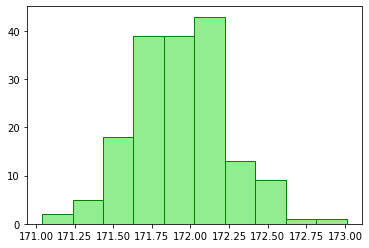

                                                                       




Distribution of height_left values
--------------------------------------------------------------------------- 

Normality test: 0.55  --> H0 accepted
Skewness: 0.03
Kurtosis: -0.46 



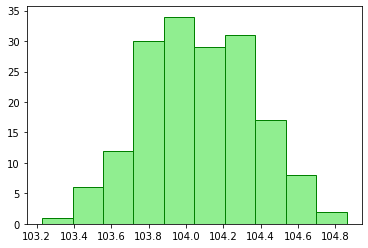

                                                                       




Distribution of height_right values
--------------------------------------------------------------------------- 

Normality test: 0.16  --> H0 accepted
Skewness: 0.17
Kurtosis: -0.0 



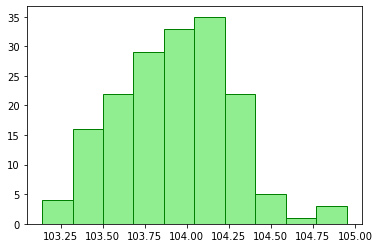

                                                                       




Distribution of margin_low values
--------------------------------------------------------------------------- 

Normality test: 0.0 --> H0 rejected
Skewness: 0.58
Kurtosis: -0.74 



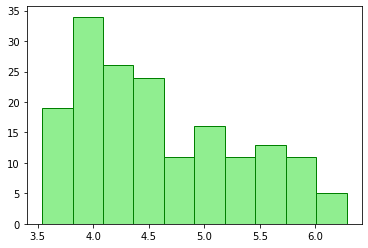

                                                                       




Distribution of margin_up values
--------------------------------------------------------------------------- 

Normality test: 0.2  --> H0 accepted
Skewness: -0.2
Kurtosis: 0.55 



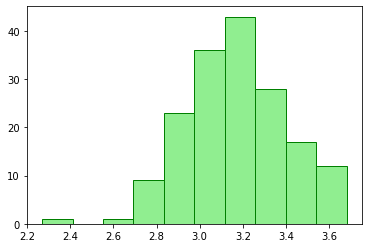

                                                                       




Distribution of length values
--------------------------------------------------------------------------- 

Normality test: 0.0 --> H0 rejected
Skewness: -0.66
Kurtosis: -0.53 



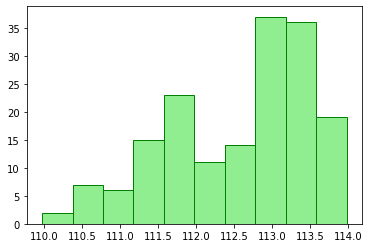

In [5]:
# Display the distribution of each variable and test their normality
for column in notes.columns[1:]:
    print('\n\nDistribution of',column,'values')
    print('-'*75,'\n')
    if st.shapiro(notes[column]).pvalue > 0.05: # Apply a shapiro-wilk test
        print("Normality test:",round(st.shapiro(notes[column]).pvalue,2)," --> H0 accepted")
    else:
        print("Normality test:",round(st.shapiro(notes[column]).pvalue,2),"--> H0 rejected") 
    print("Skewness:",round(notes[column].skew(),2))
    print("Kurtosis:",round(notes[column].kurtosis(),2),'\n')
    plt.hist(notes[column], color = "lightgreen", ec= "green")
    plt.show()
    print(' '*70,'\n\n')



 diagonal
--------------------------------------------------------------------------- 

Outliers detected: 6 
 5      172.57
23     172.59
34     172.75
39     171.13
70     171.04
166    173.01
Name: diagonal, dtype: float64 



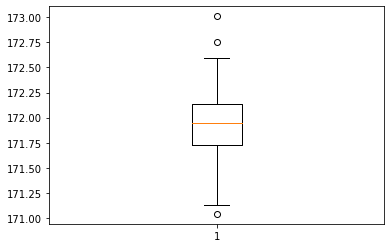

                                                                       




 height_left
--------------------------------------------------------------------------- 

Outliers detected: 2 
 0     104.86
49    103.23
Name: height_left, dtype: float64 



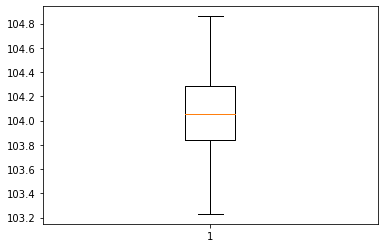

                                                                       




 height_right
--------------------------------------------------------------------------- 

Outliers detected: 4 
 0      104.95
39     103.14
112    104.83
122    104.86
Name: height_right, dtype: float64 



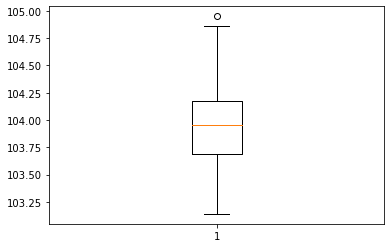

                                                                       




 margin_low
--------------------------------------------------------------------------- 

Outliers detected: 4 
 121    6.19
131    6.16
153    6.19
158    6.28
Name: margin_low, dtype: float64 



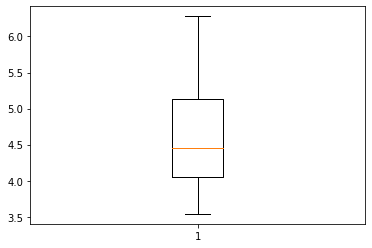

                                                                       




 margin_up
--------------------------------------------------------------------------- 

Outliers detected: 6 
 4      2.27
15     2.56
106    3.67
120    3.68
129    3.66
149    3.65
Name: margin_up, dtype: float64 



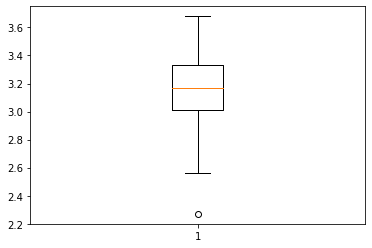

                                                                       




 length
--------------------------------------------------------------------------- 

Outliers detected: 7 
 137    110.64
142    110.53
147    110.48
151    109.97
159    110.31
161    110.61
167    110.68
Name: length, dtype: float64 



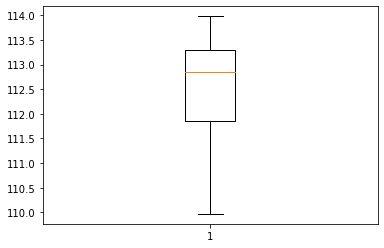

In [6]:
# Check the outliers
outliersIndexList = [] # track all the outliers

for column in notes.columns[1:]:
    print('\n\n',column)
    print('-'*75,'\n')
    q1, q3 = np.percentile(notes[column], [25, 75])
    iqr = q3 - q1
    lower_bound = np.median(notes[column]) - 1.5*iqr
    upper_bound = np.median(notes[column]) + 1.5*iqr
    outliers = notes[column][(notes[column] < lower_bound) | (notes[column] > upper_bound)]
    print('Outliers detected:',outliers.count(),'\n',outliers,'\n')
    outliersIndexList = np.append(outliersIndexList, outliers.index.values)
    plt.boxplot(notes[column])
    plt.show()
    print(' '*70,'\n\n')

is_genuine
False    18
True     11
Name: diagonal, dtype: int64

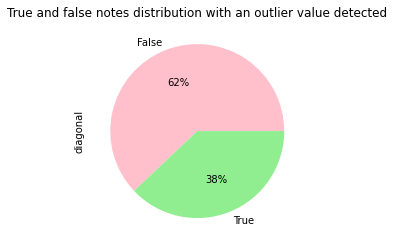

In [7]:
# Display the authenticity of outliers
outliersIndexList = outliersIndexList.astype(int)
outliersAuthenticity = notes.loc[outliersIndexList].groupby('is_genuine').count()
outliersAuthenticity['diagonal'].plot(kind='pie',autopct='%1.0f%%', title= 'True and false notes distribution with an outlier value detected', colors =['pink','lightgreen'])
outliersAuthenticity['diagonal']



Lorenz curve of diagonal
--------------------------------------------------------------------------- 

Gini index:  0.00098926502133323 



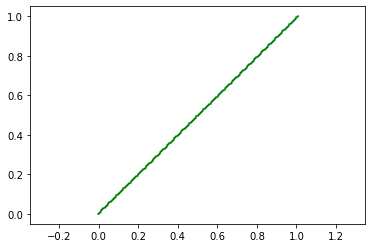

                                                                       




Lorenz curve of height_left
--------------------------------------------------------------------------- 

Gini index:  0.0016290976983809324 



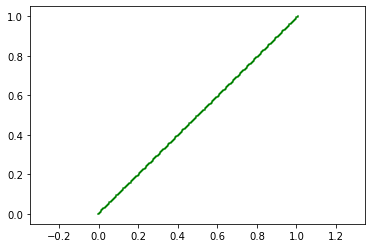

                                                                       




Lorenz curve of height_right
--------------------------------------------------------------------------- 

Gini index:  0.0017930612541421365 



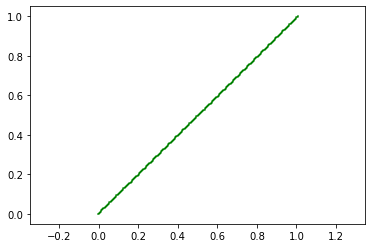

                                                                       




Lorenz curve of margin_low
--------------------------------------------------------------------------- 

Gini index:  0.08555977858837327 



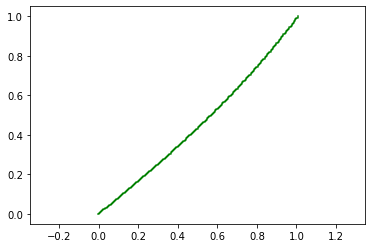

                                                                       




Lorenz curve of margin_up
--------------------------------------------------------------------------- 

Gini index:  0.04163136876547724 



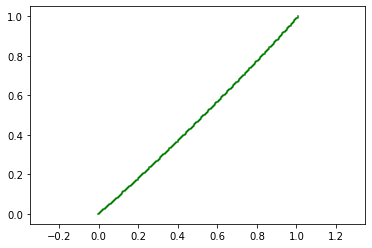

                                                                       




Lorenz curve of length
--------------------------------------------------------------------------- 

Gini index:  0.004581784398901112 



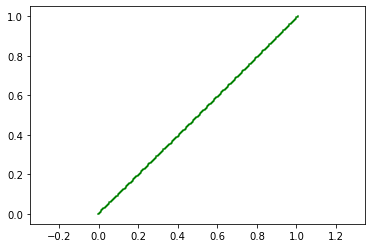

In [8]:
# Measure of concentration: Lorenz curve + gini index
for column in notes.columns[1:]:
    print('\n\nLorenz curve of',column)
    print('-'*75,'\n')
    n = len(notes[column].values)
    lorenz = np.cumsum(np.sort(notes[column].values)) / notes[column].values.sum()
    lorenz = np.append([0],lorenz)
    gini =  2 * (0.5 -((lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n))
    print('Gini index: ',gini,'\n')
    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1)
    plt.plot(xaxis,lorenz,drawstyle='steps-post', color= 'green')
    plt.show()
    print(' '*70,'\n\n')

In [9]:
# Distribution of true and false
# Display the count by variable
genuineDistribution = notes.groupby('is_genuine').count()
genuineDistribution

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,70,70,70,70,70,70
True,100,100,100,100,100,100


<AxesSubplot:title={'center':'True and false notes distribution'}, ylabel='diagonal'>

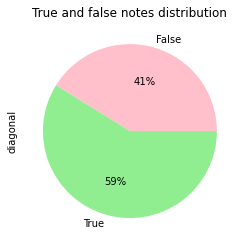

In [10]:
# Display the global percentage distribution
genuineDistribution['diagonal'].plot(kind='pie',autopct='%1.0f%%', title= 'True and false notes distribution', colors =['pink','lightgreen'])

<span style='color:Green'> **Conclusion of univariate analysis** </span><br>

**Distribution**:<br>
> 2 variables, Margin_low and Length are not normally distributed<br>
--> These variables do not have the requirements to satisfy pearson's correlation test
> Balanced dataset throught the endog which is a good point

**Dispersion**:<br>
> No noticeable outliers which could result to an obvious error<br>
> Near 40% of outliers belong to authentic notes <br>
--> No reason to not consider these values and I decided to keep all rows of the dataset<br>

**Concentration**:<br>
> No anomaly detected, the individuals are consistenly distributed through each of their variables as we can expect given the nature of the dataset <br>
> Near 60% of of sample represent authentic notes which is a good distribution to train a model to detect true and false notes<br>
> Although the sample is a bit small

#### 1.2 - Bivariate analysis <a class="anchor" id="bi"></a>

In [11]:
# All the data are quantitatives except the columns indicate the authenticity
# 1st check all the quantitative variables with each others to see if their correlations

Diagonal and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: 1.0
Covariance: 0.09294435986159198 



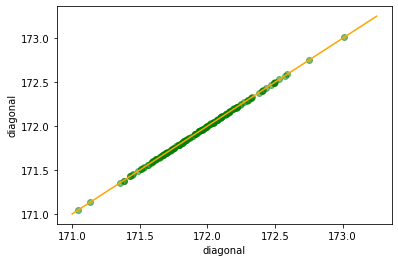

                                                                       


Diagonal and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3195837953309817
Covariance: 0.028966851211072675 



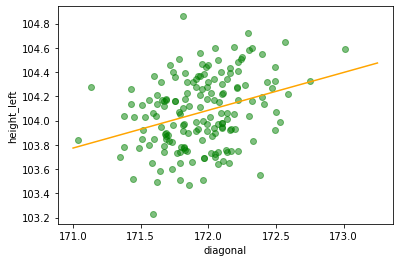

                                                                       


Diagonal and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.220418013218924
Covariance: 0.02217581314878903 



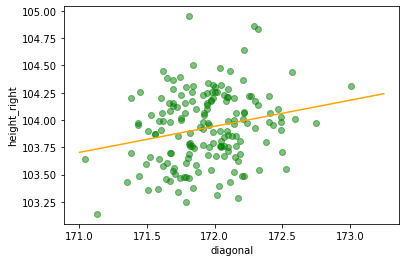

                                                                       


Diagonal and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.18102039887783855
Covariance: -0.038633010380622675 



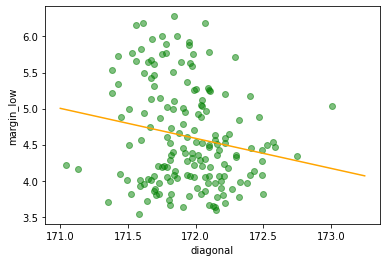

                                                                       


Diagonal and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.027365547058995767
Covariance: -0.0019661245674740396 



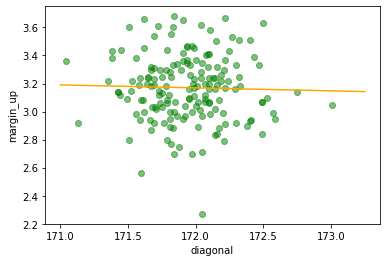

                                                                       


Diagonal and length
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.08029518555722719
Covariance: 0.022563287197232162 



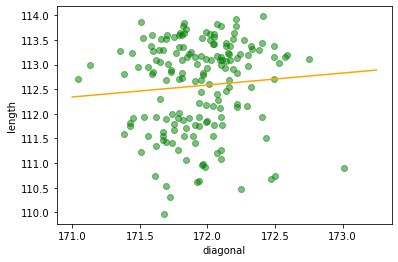

In [12]:
# Diagonal vs the others
for column in notes.columns[1:]:
    print('Diagonal and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["diagonal"],notes[column])[0])
    print("Covariance:",np.cov(notes["diagonal"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['diagonal']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['diagonal'],result.params['intercept']
    plt.plot(notes["diagonal"],notes[column],'o',color='green', alpha=0.5)
    plt.plot(np.arange(171,173.5,0.25),[a*x+b for x in np.arange(171,173.5,0.25)], color='orange') # Display the linear regression
    plt.xlabel("diagonal")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

Height left and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3195837953309817
Covariance: 0.028966851211072675 



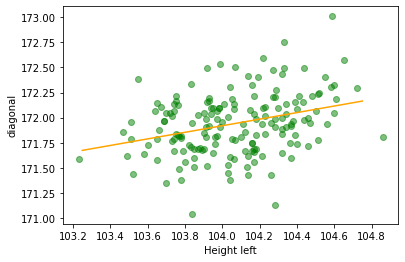

                                                                       


Height left and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: 1.0
Covariance: 0.0883914048442906 



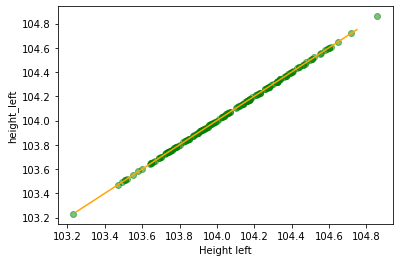

                                                                       


Height left and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.7343902682297873
Covariance: 0.07205313494809684 



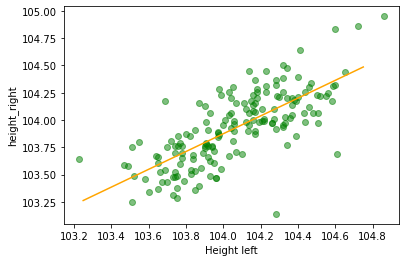

                                                                       


Height left and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.4245300334963097
Covariance: 0.08835537024221467 



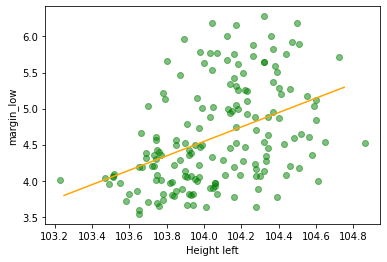

                                                                       


Height left and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3247876403536101
Covariance: 0.022756207612456728 



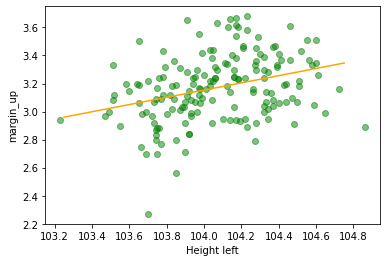

                                                                       


Height left and length
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.4213873467305502
Covariance: -0.11547496885813116 



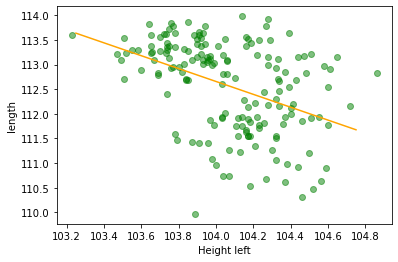

In [13]:
# height left vs the others
for column in notes.columns[1:]:
    print('Height left and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["height_left"],notes[column])[0])
    print("Covariance:",np.cov(notes["height_left"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['height_left']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['height_left'],result.params['intercept']
    plt.plot(notes["height_left"],notes[column],'o',color='green',alpha=0.5)
    plt.plot(np.arange(103.25,105,0.25),[a*x+b for x in np.arange(103.25,105,0.25)], color='orange') # Display the linear regression
    plt.xlabel("Height left")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

Height right and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.220418013218924
Covariance: 0.02217581314878903 



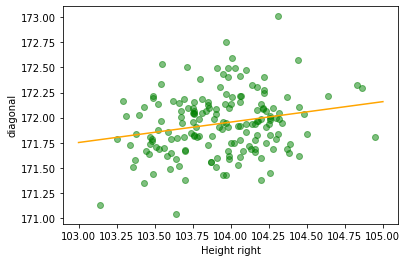

                                                                       


Height right and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.7343902682297873
Covariance: 0.07205313494809684 



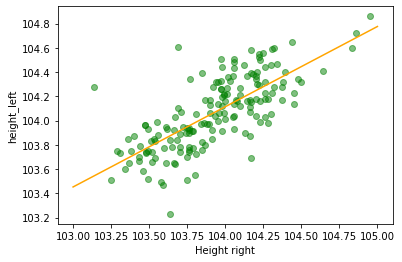

                                                                       


Height right and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.9999999999999999
Covariance: 0.10890351557093415 



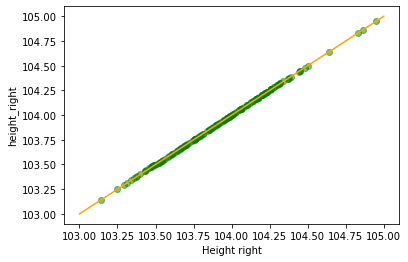

                                                                       


Height right and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.5093752409395518
Covariance: 0.11767339792387549 



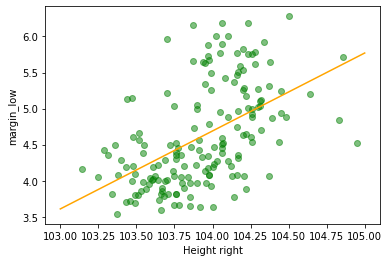

                                                                       


Height right and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3669178770592877
Covariance: 0.028535480968858024 



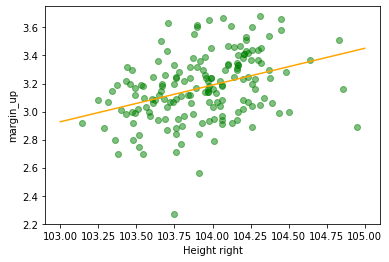

                                                                       


Height right and length
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.4170205600902359
Covariance: -0.12684687197231792 



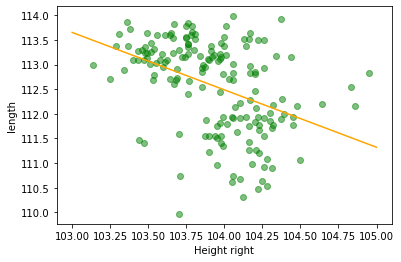

In [14]:
# height right vs the others
for column in notes.columns[1:]:
    print('Height right and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["height_right"],notes[column])[0])
    print("Covariance:",np.cov(notes["height_right"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['height_right']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['height_right'],result.params['intercept']
    plt.plot(notes["height_right"],notes[column],'o',color='green',alpha=0.5)
    plt.plot(np.arange(103,105.25,0.25),[a*x+b for x in np.arange(103,105.25,0.25)],color='orange') # Display the linear regression
    plt.xlabel("Height right")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

Margin low and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.18102039887783855
Covariance: -0.038633010380622675 



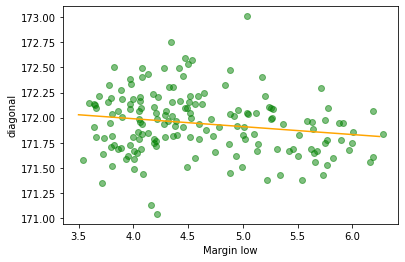

                                                                       


Margin low and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.4245300334963097
Covariance: 0.08835537024221467 



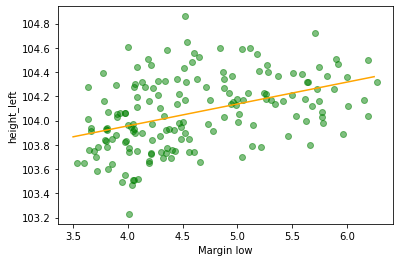

                                                                       


Margin low and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.5093752409395518
Covariance: 0.11767339792387549 



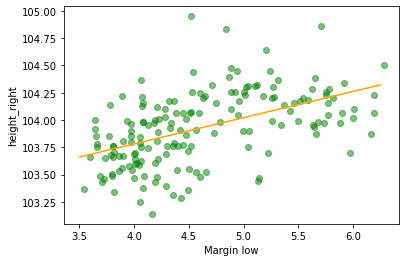

                                                                       


Margin low and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.9999999999999996
Covariance: 0.4900484567474048 



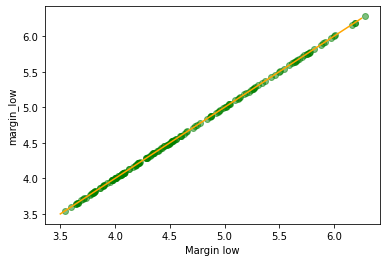

                                                                       


Margin low and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.17111283050073067
Covariance: 0.028229128027681665 



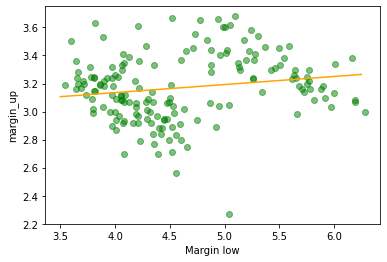

                                                                       


Margin low and length
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.6373516884716645
Covariance: -0.41124440138408297 



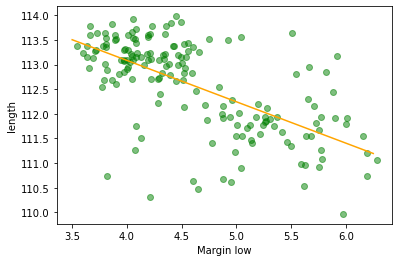

In [15]:
# Margin low vs the others
for column in notes.columns[1:]:
    print('Margin low and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["margin_low"],notes[column])[0])
    print("Covariance:",np.cov(notes["margin_low"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['margin_low']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['margin_low'],result.params['intercept']
    plt.plot(notes["margin_low"],notes[column],'o',color='green',alpha=0.5)
    plt.plot(np.arange(3.50,6.50,0.25),[a*x+b for x in np.arange(3.5,6.50,0.25)],color='orange') # Display the linear regression
    plt.xlabel("Margin low")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

Margin up and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.027365547058995767
Covariance: -0.0019661245674740396 



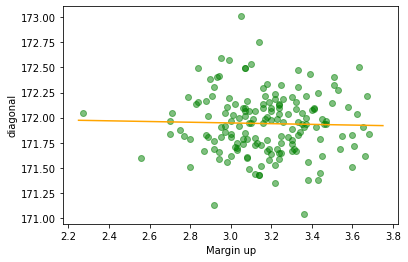

                                                                       


Margin up and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3247876403536101
Covariance: 0.022756207612456728 



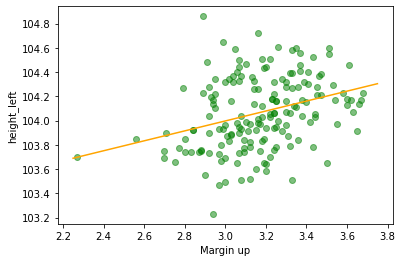

                                                                       


Margin up and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.3669178770592877
Covariance: 0.028535480968858024 



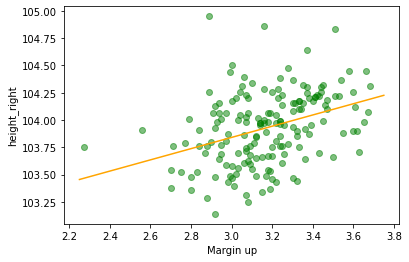

                                                                       


Margin up and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.17111283050073067
Covariance: 0.028229128027681665 



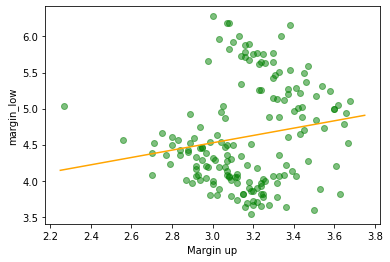

                                                                       


Margin up and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.9999999999999996
Covariance: 0.05553806574394463 



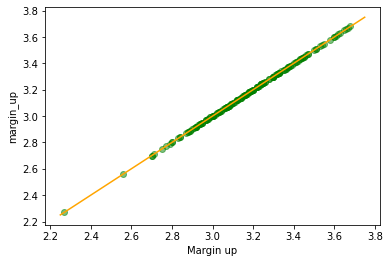

                                                                       


Margin up and length
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.5252838489032958
Covariance: -0.11410134602076118 



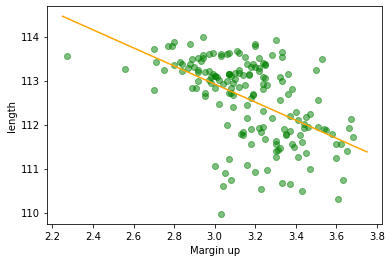

In [16]:
# Margin up vs the others
for column in notes.columns[1:]:
    print('Margin up and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["margin_up"],notes[column])[0])
    print("Covariance:",np.cov(notes["margin_up"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['margin_up']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['margin_up'],result.params['intercept']
    plt.plot(notes["margin_up"],notes[column],'o',color='green',alpha=0.5)
    plt.plot(np.arange(2.25,4,0.25),[a*x+b for x in np.arange(2.25,4,0.25)], color='orange') # Display the linear regression
    plt.xlabel("Margin up")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

Length and diagonal
--------------------------------------------------------------------------- 

Pearson's coefficient: 0.08029518555722719
Covariance: 0.022563287197232162 



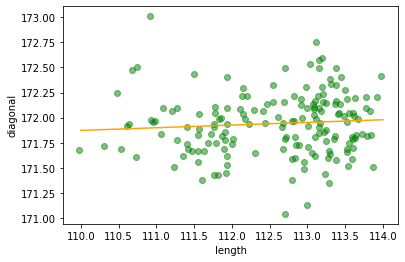

                                                                       


Length and height_left
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.4213873467305502
Covariance: -0.11547496885813116 



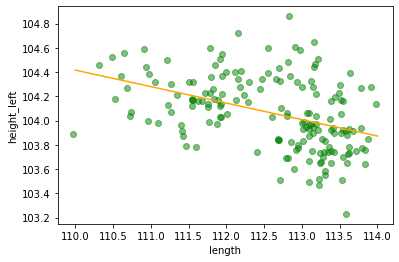

                                                                       


Length and height_right
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.4170205600902359
Covariance: -0.12684687197231792 



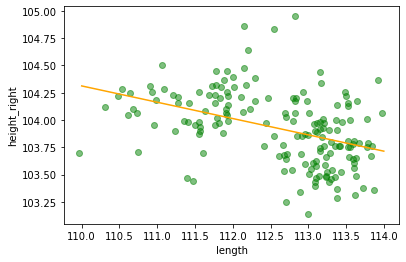

                                                                       


Length and margin_low
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.6373516884716645
Covariance: -0.41124440138408297 



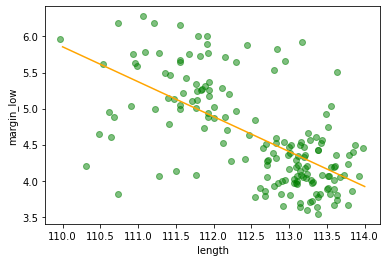

                                                                       


Length and margin_up
--------------------------------------------------------------------------- 

Pearson's coefficient: -0.5252838489032958
Covariance: -0.11410134602076118 



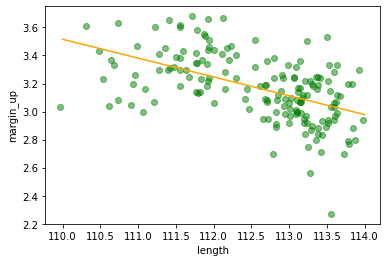

                                                                       


Length and length
--------------------------------------------------------------------------- 

Pearson's coefficient: 1.0
Covariance: 0.8495768892733558 



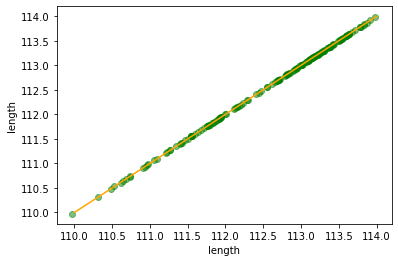

In [17]:
# Length vs the others
for column in notes.columns[1:]:
    print('Length and',column)
    print('-'*75,'\n')
    print("Pearson's coefficient:",st.pearsonr(notes["length"],notes[column])[0])
    print("Covariance:",np.cov(notes["length"],notes[column],ddof=0)[1,0],'\n')
    # Compute the linear regression
    Y = notes[column]
    X = notes[['length']]
    X = X.copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
    a,b = result.params['length'],result.params['intercept']
    plt.plot(notes["length"],notes[column],'o',color='green',alpha=0.5)
    plt.plot(np.arange(110,114.25,0.25),[a*x+b for x in np.arange(110,114.25,0.25)], color='orange') # Display the linear regression
    plt.xlabel("length")
    plt.ylabel(column)
    plt.show()
    print(' '*70,'\n\n')

In [18]:
# 2nd check all the quantitative variables with the qualitative one to see if their is a correlation and if we can find false notes with a particular variable

In [19]:
# Define the Eta squared formula
def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS

Is_genuine and diagonal
--------------------------------------------------------------------------- 

Eta squared:  0.019  --> Small relationship



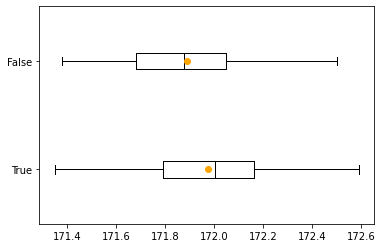

                                                                       


Is_genuine and height_left
--------------------------------------------------------------------------- 

Eta squared:  0.213  --> Large relationship



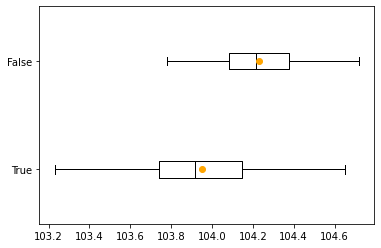

                                                                       


Is_genuine and height_right
--------------------------------------------------------------------------- 

Eta squared:  0.304  --> Large relationship



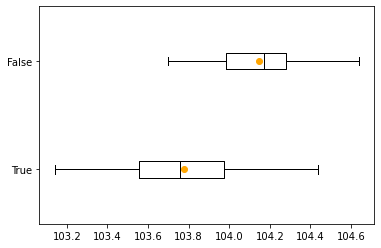

                                                                       


Is_genuine and margin_low
--------------------------------------------------------------------------- 

Eta squared:  0.64  --> Large relationship



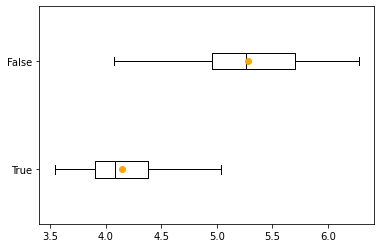

                                                                       


Is_genuine and margin_up
--------------------------------------------------------------------------- 

Eta squared:  0.34  --> Large relationship



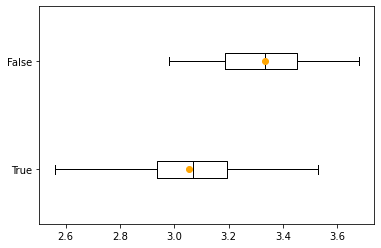

                                                                       


Is_genuine and length
--------------------------------------------------------------------------- 

Eta squared:  0.682  --> Large relationship



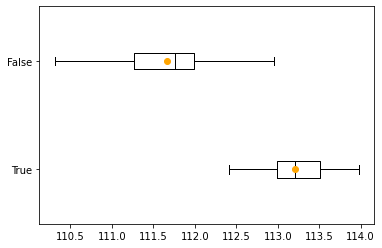

In [20]:
# Is_genuine vs the others
for column in notes.columns[1:]:
    print('Is_genuine and',column)
    print('-'*75,'\n')
    Y = column
    X = "is_genuine"
    categories = notes[X].unique()
    groups = []
    for m in categories:
        groups.append(notes[notes[X]==m][Y])
    if eta_squared(notes[X],notes[Y]) > 0.14: # Calculate the Eta squared
        print("Eta squared: ",round(eta_squared(notes[X],notes[Y]),3)," --> Large relationship\n")
    elif eta_squared(notes[X],notes[Y]) > 0.06:
        print("Eta squared: ",round(eta_squared(notes[X],notes[Y]),3)," --> Medium relationship\n")
    elif eta_squared(notes[X],notes[Y]) > 0.01:
        print("Eta squared: ",round(eta_squared(notes[X],notes[Y]),3)," --> Small relationship\n")
    else:
        print("Eta squared: ",round(eta_squared(notes[X],notes[Y]),3)," --> No relationship\n")
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'orange','markerfacecolor':'orange'}
    plt.boxplot(groups, labels=categories,showfliers=False,medianprops=medianprops, vert=False, patch_artist=False, showmeans=True, meanprops=meanprops)
    plt.show()
    print(' '*70,'\n\n')

In [21]:
# Check multicollinearity showing the correlations coefficient
notesForCorr = notes[['diagonal','height_left','height_right','margin_up','margin_low','length']].copy()
corr = notesForCorr.corr()
corr

,diagonal,height_left,height_right,margin_up,margin_low,length
diagonal,1.000000,0.319584,0.220418,-0.027366,-0.181020,0.080295
height_left,0.319584,1.000000,0.734390,0.324788,0.424530,-0.421387
height_right,0.220418,0.734390,1.000000,0.366918,0.509375,-0.417021
margin_up,-0.027366,0.324788,0.366918,1.000000,0.171113,-0.525284
margin_low,-0.181020,0.424530,0.509375,0.171113,1.000000,-0.637352
length,0.080295,-0.421387,-0.417021,-0.525284,-0.637352,1.000000


<span style='color:Green'> **Conclusion of bivariate analysis** </span><br>

> A correlation found between height_right/height_left and margin low/lenght<br>
--> Thus we must be vigilant about multicollinearity issues<br>

> All the quantitatives variables have a relationship with the "is_genuine" qualitative variable, 5 on 6 have even a strong bond<br>
--> But taken individually each variable is not sufficient to say if the note in true or not<br>


### 2 - Principal component analysis <a class="anchor" id="task2"></a>
***

#### 2.1 - Scree plot <a class="anchor" id="scree"></a>

In [22]:
# Select the number of principal components we will return
num_components = 6

# Create the PCA model
pca = PCA(n_components=num_components)

# Delete the non quantitative data: is_genuine
notes_quantitative = notes[['diagonal','height_left','height_right','margin_up','margin_low','length']].copy()

# Normalized the dataframe
scaler = StandardScaler()
normalized_notes = scaler.fit_transform(notes_quantitative)
normalized_notes = pd.DataFrame(normalized_notes, index= notes_quantitative.index, columns=notes_quantitative.columns)

# Fit the model with the standardised data
pca.fit(normalized_notes)

PCA(n_components=6)

In [23]:
# Check if the cumulative sum of all PCA equal 1
pca.explained_variance_ratio_.cumsum()

array([0.47447921, 0.69405027, 0.83639551, 0.92165846, 0.96778669,
       1.        ])

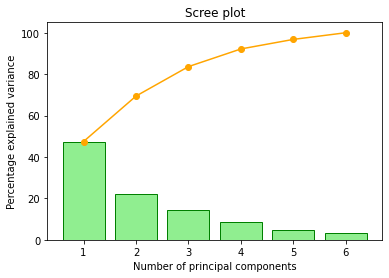

In [24]:
# Display the scree plot  
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree, color = "lightgreen", ec= "green")
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="orange",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show(block=False)

#### 2.2 - Correlation circle <a class="anchor" id="circle"></a>

In [25]:
# Import the correlation circle plot function
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="green", alpha= 0.5)
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="green", alpha=1)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='green')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

# Import factorial plot function
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

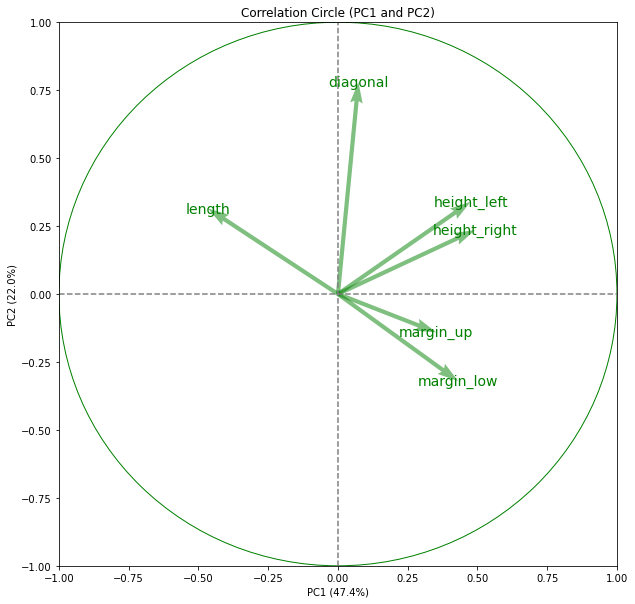

In [26]:
# plot the correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(normalized_notes.columns))

<span style='color:Green'> **Conclusion of PCA** </span><br>

> Good PCA results with 69% of the dataset variance explained by the 2 first principal components<br>
> The PC1 are well influenced by length, margin and height<br>
> The PC2 is more influenced by the diagonal variable <br>
> Margin_low and length are almost negatively correlated and must be handle in futur logictical regression model <br>
> Height_left and Height_right, as we begin to noticed previously, push in almost the same direction at the same strenght <br>
> To a lesser extent margin up and low may have quit the same impact <br>
--> We must consider withdrawing height_right and margin_low to see if we obtain a better model

### 3. Classification algorithm <a class="anchor" id="task3"></a>
***

#### 3.1 - K-means clustering <a class="anchor" id="kmeans"></a>

In [27]:
# Display individual Factor map with the 2 K-means group in different colors
# 1st: Carry out a K-Means clustering with 2 groups

# Delete the non quantitative data: is_genuine
notes_quantitative2 = notes[['diagonal','height_left','height_right','margin_up','margin_low','length']].copy()

# Normalized the dataframe
scaler = StandardScaler()
normalized_notes2 = scaler.fit_transform(notes_quantitative2)
normalized_notes2 = pd.DataFrame(normalized_notes2, index= notes_quantitative2.index, columns=notes_quantitative2.columns)

# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

# Fit the data to the model
kmeans.fit(normalized_notes2)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(normalized_notes2)

# Add cluster number and the "is_genuine" variable to the original data
notes_clustered = pd.DataFrame(normalized_notes2, columns=normalized_notes2.columns, index=normalized_notes2.index)
notes_clustered['cluster'] = clusters
notes_clustered2 = pd.merge(notes_clustered, notes['is_genuine'], left_index=True, right_index=True, how='inner')
notes_clustered2

,diagonal,height_left,height_right,margin_up,margin_low,length,cluster,is_genuine
0,-0.428344,2.669454,3.096563,-1.189874,-0.131590,0.281633,1,True
1,-0.887559,-1.097697,-0.691254,-1.274740,-0.860126,0.780697,0,True
2,-0.362742,-1.030427,-0.509439,-1.232307,-0.303010,1.377405,0,True
3,-0.461145,-0.963156,-0.842767,-0.213913,-1.260106,1.149571,0,True
4,0.358883,-1.232238,-0.539742,-3.820725,0.611230,1.062777,0,True
...,...,...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,1.738009,0.896930,-0.857535,1,False
166,3.507789,1.761301,1.157201,-0.510944,0.611230,-1.801418,1,False
167,1.736529,0.684972,0.520847,0.677182,0.382670,-2.050950,1,False
168,-0.395543,-0.324086,-0.145809,1.610710,0.168395,-0.759892,1,False


In [28]:
# Identify cluster group and create the related boolean variable
group0 = notes_clustered2['cluster'].loc[(notes_clustered2.cluster == 0)].count()
group1 = notes_clustered2['cluster'].loc[(notes_clustered2.cluster == 1)].count()

if group0 > group1:
    # group0 is the genuine notes
    notes_clustered2['clusterBool'] = np.where(notes_clustered2['cluster'] == 0, True, False)
else:
    # group1 is the genuine notes
    notes_clustered2['clusterBool'] = np.where(notes_clustered2['cluster'] == 0, False, True)

notes_clustered2

,diagonal,height_left,height_right,margin_up,margin_low,length,cluster,is_genuine,clusterBool
0,-0.428344,2.669454,3.096563,-1.189874,-0.131590,0.281633,1,True,False
1,-0.887559,-1.097697,-0.691254,-1.274740,-0.860126,0.780697,0,True,True
2,-0.362742,-1.030427,-0.509439,-1.232307,-0.303010,1.377405,0,True,True
3,-0.461145,-0.963156,-0.842767,-0.213913,-1.260106,1.149571,0,True,True
4,0.358883,-1.232238,-0.539742,-3.820725,0.611230,1.062777,0,True,True
...,...,...,...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,1.738009,0.896930,-0.857535,1,False,False
166,3.507789,1.761301,1.157201,-0.510944,0.611230,-1.801418,1,False,False
167,1.736529,0.684972,0.520847,0.677182,0.382670,-2.050950,1,False,False
168,-0.395543,-0.324086,-0.145809,1.610710,0.168395,-0.759892,1,False,False


In [29]:
# Show the distribution of True Positive and False Negative
tp = notes_clustered2['cluster'].loc[(notes_clustered2.clusterBool == True)&(notes_clustered2.is_genuine == True)].count()
fp = notes_clustered2['cluster'].loc[(notes_clustered2.clusterBool == True)&(notes_clustered2.is_genuine == False)].count()
tn = notes_clustered2['cluster'].loc[(notes_clustered2.clusterBool == False)&(notes_clustered2.is_genuine == False)].count()
fn = notes_clustered2['cluster'].loc[(notes_clustered2.clusterBool == False)&(notes_clustered2.is_genuine == True)].count()

data = [{'true_positive': tp,'false_positive': fp, 'true_negative': tn, 'false_negative': fn}]
kmeansResultsDistribution = pd.DataFrame(data)

accuracy = round(((tp+tn)/(tp+fp+tn+fn))*100)
print('K-means clustering has an accuracy of',accuracy,'%\n')
kmeansResultsDistribution

K-means clustering has an accuracy of 95 %



,true_positive,false_positive,true_negative,false_negative
0,92,1,69,8


<AxesSubplot:>

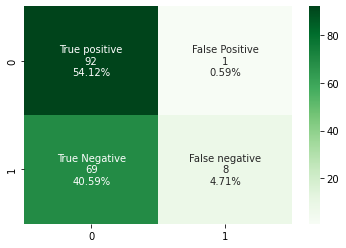

In [30]:
# Display the matrix heatmap
cf_matrix = np.array([[tp,fp],[tn,fn]])
group_names = ['True positive','False Positive','True Negative','False negative']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Greens")


#### 3.2 - Individual factorial planes <a class="anchor" id="planes"></a>

<span style='color:Orange'> **1st factorial plane plot using "Is_genuine" variable as group** </span><br>

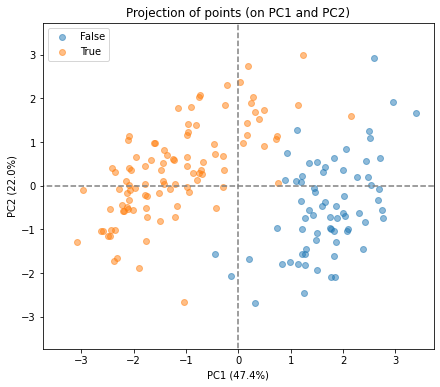

In [31]:
# 2nd: Display the graph
# Create a list of areas and their respective cluster
dfc2 = notes_clustered2.copy()
dfc2 = notes_clustered2.reset_index()
areaIsGenuine = [dfc2.loc[uni_id, "is_genuine"] for uni_id in range(0,len(normalized_notes))]

# Transform the original scaled data to the new vector space
X_projected = pca.transform(normalized_notes) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = areaIsGenuine, alpha = 0.5)
plt.show()

<span style='color:Orange'> **2nd factorial plane plot using 2 k-means group** </span><br>

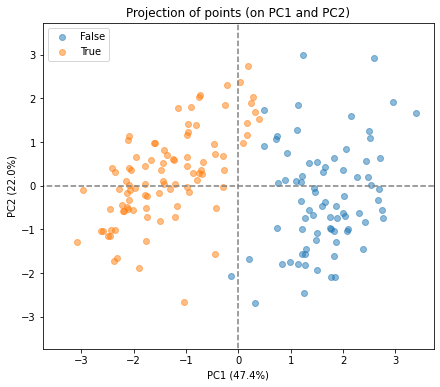

In [32]:
# 2nd: Display the graph
# Create a list of areas and their respective cluster
dfc = notes_clustered2.copy()
dfc = notes_clustered2.reset_index()
areaClusters = [dfc.loc[uni_id, "clusterBool"] for uni_id in range(0,len(normalized_notes))]

# Transform the original scaled data to the new vector space
X_projected = pca.transform(normalized_notes) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = areaClusters, alpha = 0.5)
plt.show()

<span style='color:Green'> **Conclusion of classification clustering** </span><br>

> K-means clustering seems to have a steady accuracy of 95% when it comes to classify the notes as authentic or not<br>
> If we compare the distribution of individuals between k-means and "is_genuine" variable on PC1/PC2 planes, the good job made by k-means and PCA are obvious

### 4 - Predictive model <a class="anchor" id="task4"></a>
***

#### 4.1 - Create a base logistic regression model <a class="anchor" id="base"></a>

In [33]:
# Logistic regression model
# Prepare the dataset for the modeling
dfNotes = notes.copy() # create a copy
dfNotes['is_genuine'] = dfNotes['is_genuine'].replace([True,False],[0,1]) #Transform binary values into numerical

model = smf.logit('is_genuine ~ diagonal + height_left + height_right + margin_up + length', data = dfNotes) #Model without margin_low because of higher correlation results into logit error
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.124536
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.8162
Time:                        09:10:34   Log-Likelihood:                -21.171
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.042e-38
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      388.8639    258.205      1.506      0.132    -117.209     894.937
diagonal        -3.282

In [34]:
# Display the confusion matrix & accuracy
cm = pd.DataFrame(results.pred_table())
accuracy = round(((cm[1].loc[1]+cm[0].loc[0])/ np.sum(results.pred_table()))*100,2).astype(str)+'%'
print('This base logistical model has an accuracy of ',accuracy,'\n\n Confusion matrix\n','-'*25)
results.pred_table()

This base logistical model has an accuracy of  95.29% 

 Confusion matrix
 -------------------------


array([[97.,  3.],
       [ 5., 65.]])

This base logistical model has an accuracy of  95.29% 



<AxesSubplot:>

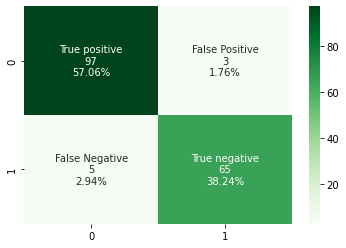

In [35]:
# Display the confusion matrix heatmap
cf_matrix2 = results.pred_table()
group_names = ['True positive','False Positive','False Negative','True negative']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

accuracy = round(((cm[1].loc[1]+cm[0].loc[0])/ np.sum(results.pred_table()))*100,2).astype(str)+'%'

print('This base logistical model has an accuracy of ',accuracy,'\n')

sns.heatmap(cf_matrix2, annot=labels, fmt="", cmap="Greens")


The distribution below shows the good quality of our model because of the clear results classification



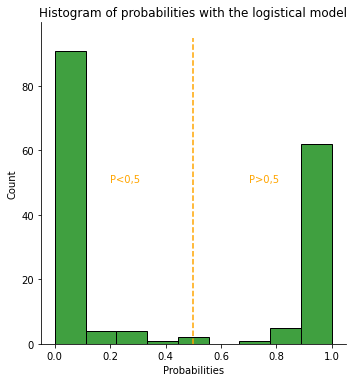

In [36]:
# Historgram of probabilities
proba = 1 / (1 + np.exp(-results.fittedvalues))
sns.displot(proba, color='green').set(xlabel='Probabilities',title='Histogram of probabilities with the logistical model')
plt.text(0.2, 50, "P<0,5", horizontalalignment='left', size='medium', color='orange')
plt.text(0.7, 50, "P>0,5", horizontalalignment='left', size='medium', color='orange')
plt.vlines(x=0.5,ymin=0,ymax=95,linestyles='dashed',color='orange')
print('\nThe distribution below shows the good quality of our model because of the clear results classification\n')
plt.show()

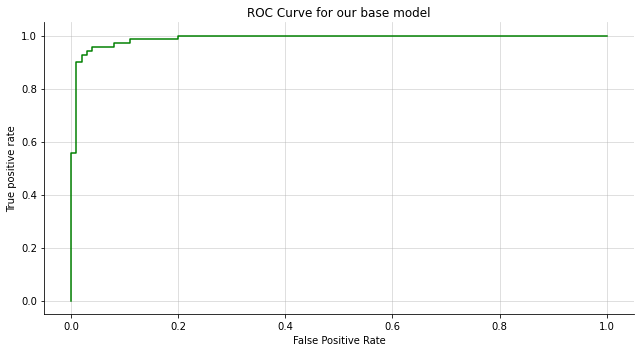

In [37]:
# Plot the ROC Curve
yhat= results.predict()
false_positive_rate, true_positive_rate, thresholds = roc_curve(dfNotes['is_genuine'], yhat)
fig, ax = plt.subplots(1,1,figsize = (9,5))
plt.plot(false_positive_rate,true_positive_rate, color='green',label='')
plt.title("ROC Curve for our base model")
plt.ylabel('True positive rate')
plt.xlabel('False Positive Rate')
plt.grid(alpha = 0.5)
sns.despine()
plt.tight_layout()

In [38]:
# Calculate the AUC
roc_auc_score(dfNotes['is_genuine'],yhat)

0.9894285714285715

<span style='color:Green'> **Conclusion of base logistic model** </span><br>
This base model has a strong 81% pseudo R-squared and a LLR p-value well below 0.05 which demonstrate its global relevancy<br>
It has also an excellent AUC of 98.94% and accuracy of 95%.<br>
But,<br>
> * A collinearity issue appears between Length and Margin_low forcing us to choose one of them to complete the logistic model
> * A second issue arises (non critical), it's the relevancy of height_left and height_right in the model tested. This finding leads to believe that we should choose also between this two variables to improve the model

### 4.2 - Select the best predictive model <a class="anchor" id="comparaison"></a>

In [39]:
# add new potential interesting variables
dfNotes['height_right2'] = np.square(dfNotes['height_right'])
dfNotes['margin_up2'] = np.square(dfNotes['margin_up'])
dfNotes['margin_low2'] = np.square(dfNotes['margin_low'])
dfNotes['length2'] = np.square(dfNotes['length'])
dfNotes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,height_right2,margin_up2,margin_low2,length2
0,0,171.81,104.86,104.95,4.52,2.89,112.83,11014.5025,8.3521,20.4304,12730.6089
1,0,171.67,103.74,103.70,4.01,2.87,113.29,10753.6900,8.2369,16.0801,12834.6241
2,0,171.83,103.76,103.76,4.40,2.88,113.84,10766.1376,8.2944,19.3600,12959.5456
3,0,171.80,103.78,103.65,3.73,3.12,113.63,10743.3225,9.7344,13.9129,12911.7769
4,0,172.05,103.70,103.75,5.04,2.27,113.55,10764.0625,5.1529,25.4016,12893.6025
...,...,...,...,...,...,...,...,...,...,...,...
165,1,172.11,104.23,104.45,5.24,3.58,111.78,10909.8025,12.8164,27.4576,12494.7684
166,1,173.01,104.59,104.31,5.04,3.05,110.91,10880.5761,9.3025,25.4016,12301.0281
167,1,172.47,104.27,104.10,4.88,3.33,110.68,10836.8100,11.0889,23.8144,12250.0624
168,1,171.82,103.97,103.88,4.73,3.55,111.87,10791.0544,12.6025,22.3729,12514.8969


In [40]:
# Define the different combination of variables we want to test
formulas = ['is_genuine ~ diagonal + height_left + height_right + margin_up + length',
            'is_genuine ~ diagonal + height_left + height_right + margin_up + margin_low',
            'is_genuine ~ diagonal + height_left + height_right + margin_up',
            'is_genuine ~ diagonal + height_left + margin_up + margin_low',
            'is_genuine ~ diagonal + height_left + margin_up + length',
            'is_genuine ~ diagonal + height_left + height_right + margin_up + margin_low2',
            'is_genuine ~ diagonal + height_left + height_right + margin_up + length2',
            'is_genuine ~ diagonal + height_left + height_right2 + margin_up2 + margin_low',
            'is_genuine ~ diagonal + height_left + height_right2 + margin_up + length',
            'is_genuine ~ length',
            'is_genuine ~ margin_up + length']

In [41]:
# Create a function for accuracy
def accuracy(results):
    cm = pd.DataFrame(results.pred_table())
    accu = (cm[1].loc[1]+cm[0].loc[0])/ np.sum(results.pred_table())
    return accu

In [42]:
#Create a function for AUC
def aucScore(endog):
    yhat= results.predict()
    return roc_auc_score(endog,yhat)
    

In [43]:
# Loop through each formula and keep the Accuracy, pseudo R-Squared and AUC
scores = []
for formula in formulas:
    results = smf.logit(formula, dfNotes).fit()
    scores.append( { 'model': formula,
        'Accuracy':accuracy(results),
        'R-squared': results.prsquared,
        'AUC': aucScore(dfNotes['is_genuine'])} 
    )

scores = pd.DataFrame(scores)

Optimization terminated successfully.
         Current function value: 0.124536
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.032936
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.312798
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.034686
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.138708
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.032605
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.124673
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033406
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.124613
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.18

In [44]:
# Display the results
pd.set_option('display.max_colwidth', None)
scores['Global'] = round(((scores['Accuracy']+scores['R-squared']+scores['AUC'])/3)*100,2) # Add a global score which is the mean of Accuracy + R-squared + AUC
scores.sort_values(by = 'Global',ascending=False).reset_index(drop = True)

,model,Accuracy,R-squared,AUC,Global
0,is_genuine ~ diagonal + height_left + margin_up + margin_low,0.982353,0.948803,0.999143,97.68
1,is_genuine ~ diagonal + height_left + height_right + margin_up + margin_low2,0.976471,0.951875,0.999429,97.59
2,is_genuine ~ diagonal + height_left + height_right + margin_up + margin_low,0.976471,0.951386,0.999429,97.58
3,is_genuine ~ diagonal + height_left + height_right2 + margin_up2 + margin_low,0.976471,0.950692,0.999429,97.55
4,is_genuine ~ diagonal + height_left + height_right + margin_up + length,0.952941,0.816181,0.989429,91.95
5,is_genuine ~ diagonal + height_left + height_right2 + margin_up + length,0.952941,0.816067,0.989429,91.95
6,is_genuine ~ diagonal + height_left + height_right + margin_up + length2,0.952941,0.815979,0.989429,91.94
7,is_genuine ~ diagonal + height_left + margin_up + length,0.947059,0.795263,0.987571,91.00
8,is_genuine ~ margin_up + length,0.952941,0.749024,0.973143,89.17
9,is_genuine ~ length,0.947059,0.723584,0.967714,87.95


<span style='color:Green'> **Conclusion of predictive model** </span><br>
As anticipate, the models without the pair of variables having some correlation bonds perform better.<br>
Trying to modifiying these variables by squaring them didn't change the outcome. <br>

As both Accuracy, R-squared and AUC are relevant performance indicators to assess a model, I choose to consider all them and make an average of them as there are normalized. <br>
> This lead to choose this model: **'is_genuine ~ diagonal + height_left + margin_up + margin_low'**